In [45]:
!pip install seaborn

In [46]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('/home/student/Desktop/enam/data_preprocessing/2_selected_descriptors.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 175 entries, A to gap
dtypes: float64(119), int64(56)
memory usage: 26.7 MB


In [48]:
df

,A,B,mu,alpha,r2,zpve,u0,cv,lipinskiHBA,lipinskiHBD,...,n9FRing,n9FaRing,GGI4,GGI5,GGI6,GGI7,JGI4,Radius,smiles_encoded,gap
0,6.20100,2.37357,1.5784,61.05,651.4974,0.125002,-308.452306,23.486,1.0,0.0,...,0,0,0.000000,0.000000,0.000000,0.0,0.000000,2,1533,0.3049
1,2.34937,1.13704,6.1857,69.45,1338.5931,0.111977,-450.159575,32.849,5.0,4.0,...,0,0,0.240000,0.000000,0.000000,0.0,0.034286,3,15198,0.2454
2,2.49407,1.66830,1.2555,71.31,1054.7578,0.159978,-460.132600,31.708,3.0,1.0,...,0,0,0.125000,0.000000,0.000000,0.0,0.041667,3,17163,0.3155
3,3.56977,1.08344,3.6245,79.17,1230.8567,0.173144,-403.176326,31.687,2.0,1.0,...,0,0,0.276111,0.170278,0.040000,0.0,0.055222,3,16714,0.2787
4,3.51047,1.06282,1.3573,84.80,1384.9594,0.207277,-388.283588,34.646,1.0,0.0,...,0,0,0.276111,0.142500,0.000000,0.0,0.069028,3,10296,0.3009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2.95820,1.74625,1.6708,79.83,1025.6990,0.161147,-385.861460,29.199,1.0,0.0,...,1,0,0.111111,0.000000,0.000000,0.0,0.037037,3,1296,0.2568
19996,2.90099,1.80710,0.9974,75.04,950.9623,0.148961,-401.887215,28.551,2.0,0.0,...,0,0,0.000000,0.000000,0.000000,0.0,0.000000,2,1046,0.2883
19997,6.14092,0.76405,4.2257,72.16,1539.3508,0.125858,-434.093462,29.731,4.0,1.0,...,0,0,0.125000,0.080000,0.055556,0.0,0.025000,3,1971,0.2517
19998,2.05970,1.80984,1.7443,82.89,1127.1204,0.155768,-385.807975,35.445,1.0,0.0,...,0,0,0.222222,0.000000,0.000000,0.0,0.044444,2,5209,0.2768


In [49]:
"""
В данном датасете уже проведен препроцессинг (см. папку descriptors):
-датасет проверен на отсутствующие и некорректные данные, дупликаты
-удалены столбцы с некорректными данными
-проведена фильтрация на основе корреляции пирсона и стандартного отклонения

! Нормализация не проведена

В данном ноутбуке будет проводиться:
- нормализация
- снижение размерности данных с применением линейных и нелинейных методов feature transformation
- визаулизация полученного датасета
- объяснение полученных дескрипторов
"""

'\nВ данном датасете уже проведен препроцессинг (см. папку homework_2):\n-датасет проверен на отсутствующие и некорректные данные, дупликаты\n-удалены столбцы с некорректными данными\n-проведена фильтрация на основе корреляции пирсона и стандартного отклонения\n\n! Нормализация не проведена\n\nВ данном ноутбуке будет проводиться:\n- снижение размерности данных с применением линейных и нелинейных методов feature transformation\n- визаулизация полученного датасета\n- объяснение полученных дескрипторов\n'

In [50]:
# Нормализация данных (для применения PCA, который чувствителен к различиям в масштабе данных)
df_descriptors = pd.DataFrame()
df_target = pd.DataFrame()
df_descriptors = df.loc[:, df.columns!='gap']
df_target = df['gap']

# Нормализуем данные
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_descriptors = scaler.fit_transform(df_descriptors)

# Применение метода главных компонент (PCA) для снижения размерности 
# Создадим объект PCA
pca = PCA()

# Обучим PCA на данных
pca.fit(scaled_descriptors)

# Получим explained variance ratio для каждой компоненты
explained_variance_ratio = pca.explained_variance_ratio_

# Вычислим кумулятивную explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Найдем количество компонент, которые объясняют, например, 95% дисперсии
n_components = np.argmax(cumulative_explained_variance_ratio >= 0.95) + 1

print(f"Оптимальное количество компонент для объяснения 95% дисперсии: {n_components}")

Оптимальное количество компонент для объяснения 95% дисперсии: 62


In [51]:
pca = PCA(n_components=n_components)

transformed_data = pca.fit_transform(scaled_descriptors)

print(transformed_data)

[[-1.67837257  0.62179848  0.19480329 ... -0.22345598 -0.05340126
  -0.15421293]
 [ 2.41377672 -0.95857684 -0.13393317 ...  0.10758028 -0.06031736
  -0.16826812]
 [-0.6893257  -1.81555161  0.36685253 ...  0.39315687  0.16278361
  -0.04798576]
 ...
 [ 0.87851449 -0.80830138 -0.7396187  ... -0.0076512  -0.10755135
   0.13893793]
 [-1.04756634  0.77687986 -0.50446653 ...  0.02490667  0.02439813
   0.02217965]
 [ 0.80802851  1.75990351 -0.38781645 ... -0.29318564  0.01138138
   0.20030891]]


In [52]:
transformed_df = pd.DataFrame(transformed_data)

transformed_df['gap'] = df_target
transformed_df

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,gap
0,-1.678373,0.621798,0.194803,-0.108655,-0.431465,-0.548310,-0.188259,0.467344,0.805793,0.521714,...,-0.145778,0.136180,0.149363,0.164955,-0.016354,-0.087396,-0.223456,-0.053401,-0.154213,0.3049
1,2.413777,-0.958577,-0.133933,1.138349,0.149927,0.444823,0.615890,-0.403380,0.622096,0.674860,...,0.254439,-0.197821,0.313852,0.333831,-0.260601,0.096819,0.107580,-0.060317,-0.168268,0.2454
2,-0.689326,-1.815552,0.366853,-0.893817,-1.023382,-0.887666,-1.467653,0.393151,-0.485834,0.648487,...,-0.076939,-0.304443,0.052689,-0.144657,-0.319800,-0.430828,0.393157,0.162784,-0.047986,0.3155
3,-0.657622,0.078718,0.268385,1.087692,-0.315219,0.852714,1.265713,1.010074,-1.600703,-0.044025,...,0.024200,-0.118433,0.043224,-0.158826,0.009597,0.095494,-0.332864,0.121158,0.010691,0.2787
4,-1.840158,0.408121,-0.076951,-0.399845,-0.861435,-0.115383,0.278299,-1.216077,-0.490411,-1.142720,...,-0.101025,0.227344,-0.051856,0.146840,0.038437,0.148012,-0.029966,0.145328,-0.173955,0.3009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1.380196,0.932830,0.502603,-0.662665,-1.060167,-0.449531,0.255051,0.651034,0.548531,0.585654,...,-0.326707,-0.021937,0.034166,0.141747,0.075824,0.089052,0.024184,0.054577,-0.123785,0.2568
19996,-2.151819,-0.609588,1.444002,-1.039171,-0.131531,0.484563,0.085359,-0.926206,1.124491,-0.017621,...,0.038963,0.252780,0.134570,0.110769,0.020542,-0.083541,-0.127238,0.071983,0.018793,0.2883
19997,0.878514,-0.808301,-0.739619,-0.396917,-0.648273,0.983900,-0.117932,0.154785,1.307304,0.186188,...,-0.210488,-0.133836,-0.143687,-0.102174,0.142018,0.173342,-0.007651,-0.107551,0.138938,0.2517
19998,-1.047566,0.776880,-0.504467,-0.048459,0.267996,-0.437728,-0.543049,0.203558,0.913371,-0.550616,...,-0.025281,-0.075873,-0.223693,0.013592,-0.002673,-0.056313,0.024907,0.024398,0.022180,0.2768


          0         1         2         3         4         5         6  \
0 -1.678373  0.621798  0.194803 -0.108655 -0.431465 -0.548310 -0.188259   
1  2.413777 -0.958577 -0.133933  1.138349  0.149927  0.444823  0.615890   
2 -0.689326 -1.815552  0.366853 -0.893817 -1.023382 -0.887666 -1.467653   
3 -0.657622  0.078718  0.268385  1.087692 -0.315219  0.852714  1.265713   
4 -1.840158  0.408121 -0.076951 -0.399845 -0.861435 -0.115383  0.278299   

          7         8         9  ...        53        54        55        56  \
0  0.467344  0.805793  0.521714  ... -0.145778  0.136180  0.149363  0.164955   
1 -0.403380  0.622096  0.674860  ...  0.254439 -0.197821  0.313852  0.333831   
2  0.393151 -0.485834  0.648487  ... -0.076939 -0.304443  0.052689 -0.144657   
3  1.010074 -1.600703 -0.044025  ...  0.024200 -0.118433  0.043224 -0.158826   
4 -1.216077 -0.490411 -1.142720  ... -0.101025  0.227344 -0.051856  0.146840   

         57        58        59        60        61     gap  
0 -0.0

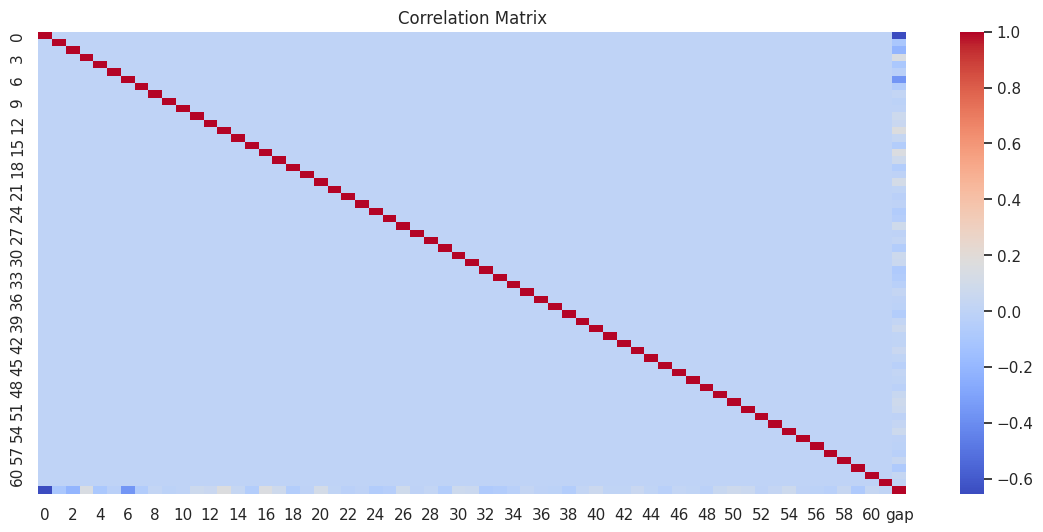

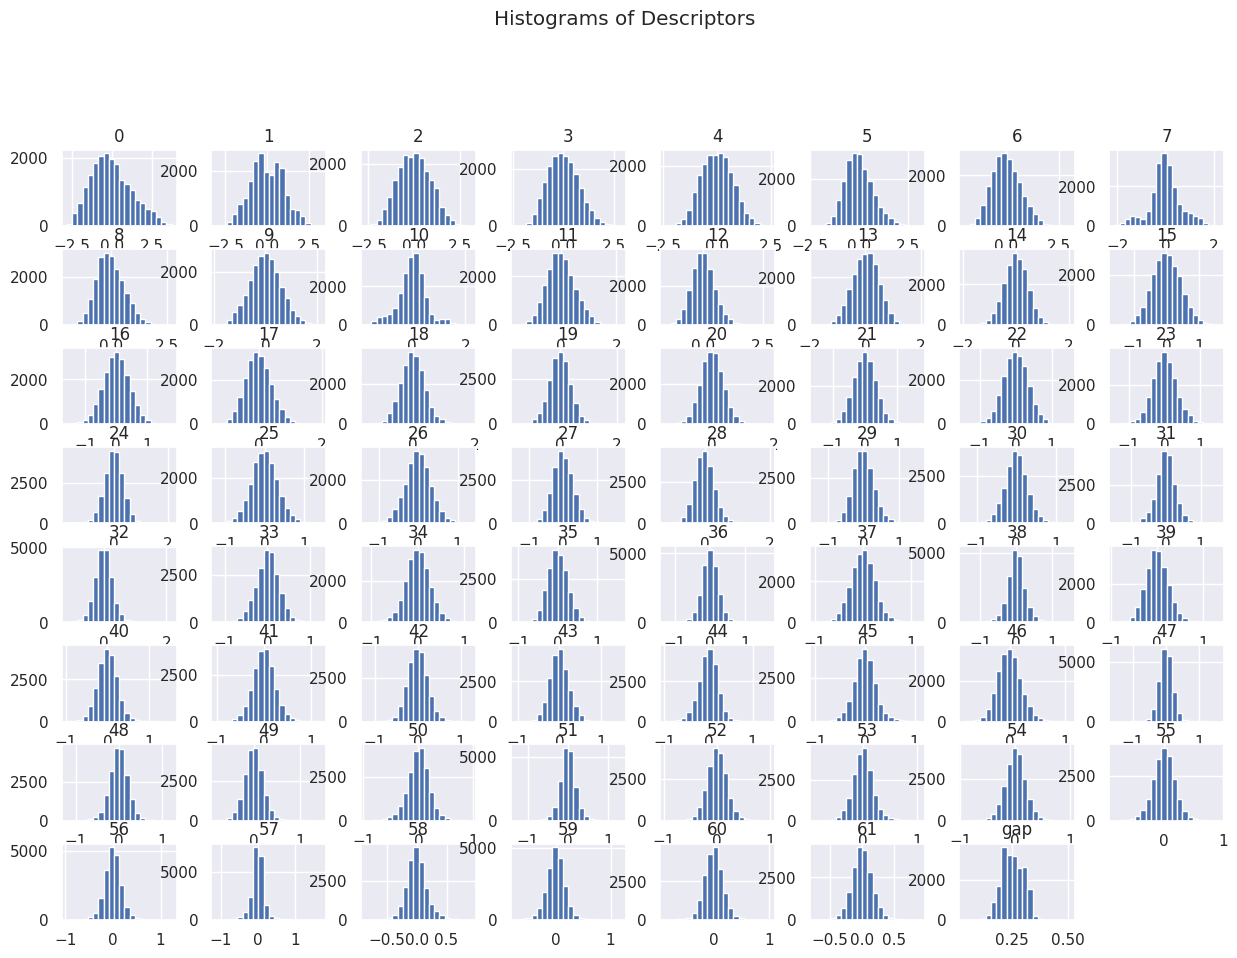

In [53]:
# Вывод основной информации о данных
print(transformed_df.head())  # Первые строки данных
print(transformed_df.describe())  # Описательная статистика

# Построение матрицы корреляции
correlation_matrix = transformed_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Построение гистограмм для каждого дескриптора
transformed_df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Descriptors', x=0.5, y=1.02)
plt.show()

In [54]:
"""
Компонент все еще очень много, сложно делать выводы. 
"""

'\nКомпонент все еще очень много, сложно делать выводы. \n'

<Axes: title={'center': 'Component Variance'}, xlabel='PCs', ylabel='Eigenvalues'>

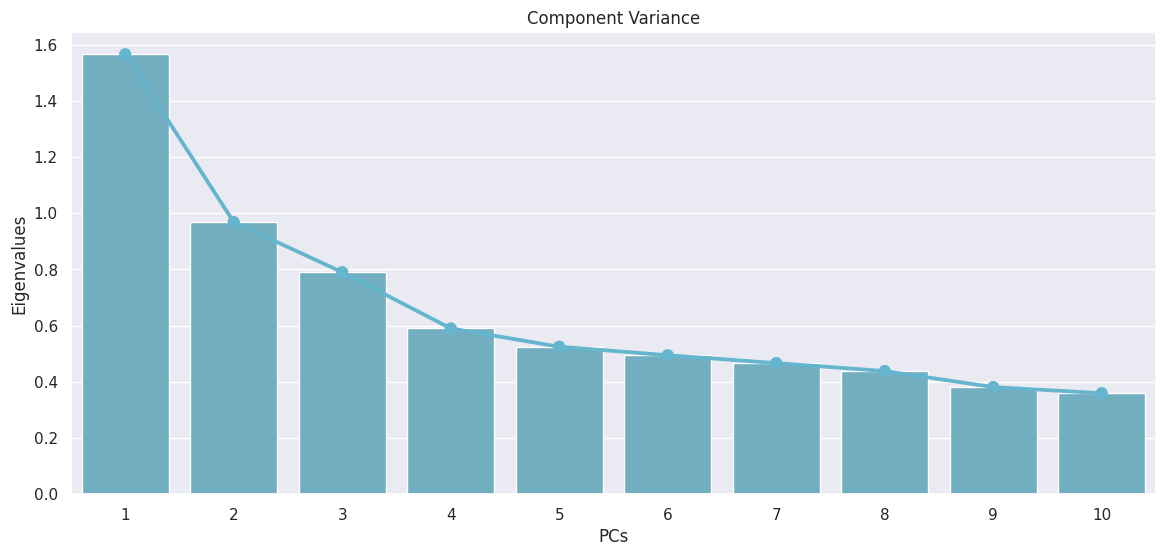

In [55]:
# Объясненная корреляция для каждого PC
dfScree = pd.DataFrame({'Eigenvalues':pca.explained_variance_,'PCs':[i for i in range(1,pca.n_components_+1)]})

# Plot the variance explained by each component
sns.barplot(x='PCs',y="Eigenvalues",data=dfScree[0:10], color="c").set_title('Component Variance')
sns.pointplot(x='PCs',y="Eigenvalues",data=dfScree[0:10], color="c")

In [56]:
"""
Основываясь на критерии отбора по собственным значениям (оставлять РС с собст. зн. больше 1)
следует оставить только первых два компонента. Однако сам выбор количества компонент был
основан на проценте объясненной дисперсии (95%). Считаю дальнейшее уменьшение размерности для применения в мл 
не целесообразным. Для визуализации использую первые две компоненты
"""

'\nОсновываясь на критерии отбора по собственным значениям (оставлять РС с собст. зн. больше 1)\nследует оставить только первых два компонента. Однако сам выбор количества компонент был\nоснован на проценте объясненной дисперсии (95%). Считаю дальнейшее уменьшение размерности для применения в мл \nне целесообразным. Для визуализации использую первые две компоненты\n'

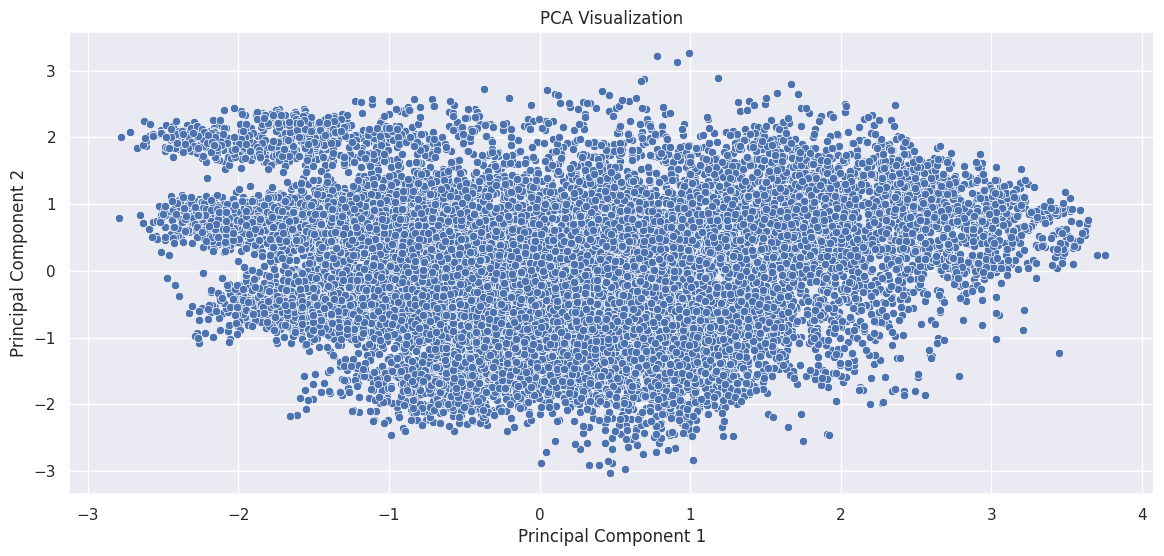

In [57]:
# Визуализация данных
sns.scatterplot(x=transformed_data[:, 0], y=transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

In [58]:
"""
Выбор дескрипторов также можно провести на основе важности дескрипторов.
Также это поможет объяснить выбранные главные компоненты
"""

'\nВыбор дескрипторов также можно провести на основе важности дескрипторов.\nТакже это поможет объяснить выбранные главные компоненты\n'

In [59]:
from sklearn.ensemble import RandomForestRegressor

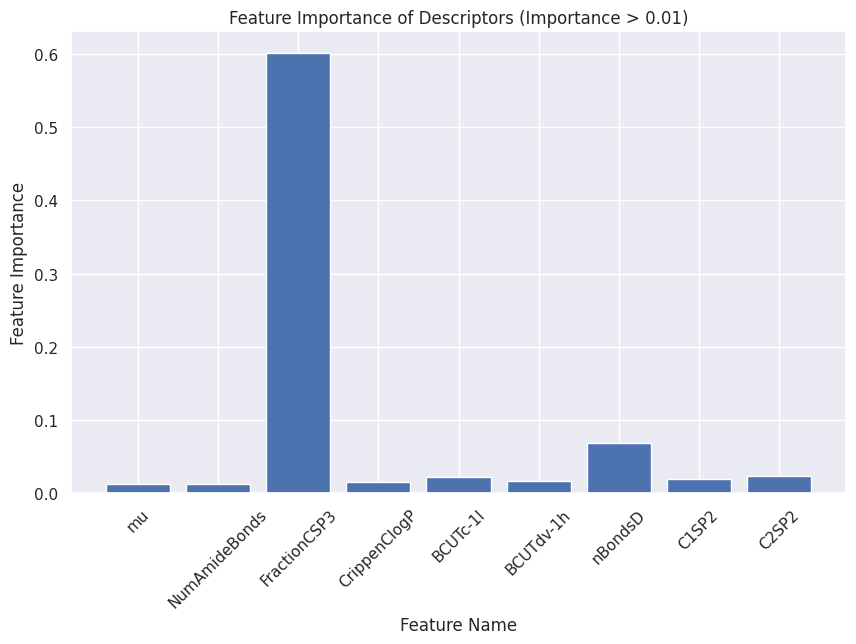

In [72]:
# важность дескрипторов
rf = RandomForestRegressor(n_estimators=100)
rf.fit(df.loc[:, df.columns!='gap'], df['gap'])

# Получение важности признаков
feature_importance = rf.feature_importances_

# Получение названий дескрипторов
feature_names = df.columns[df.columns != 'gap']

# Фильтрация признаков с важностью больше 0.01 и их названий
selected_features = [feature_names[i] for i, importance in enumerate(feature_importance) if importance > 0.01]
selected_importance = [importance for i, importance in enumerate(feature_importance) if importance > 0.01]

# Создание графика для визуализации важности признаков
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), selected_importance, align='center')
plt.xticks(range(len(selected_features)), selected_features, rotation=45)  # Поворот названий дескрипторов для лучшей читаемости
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance of Descriptors (Importance > 0.01)')
plt.show()

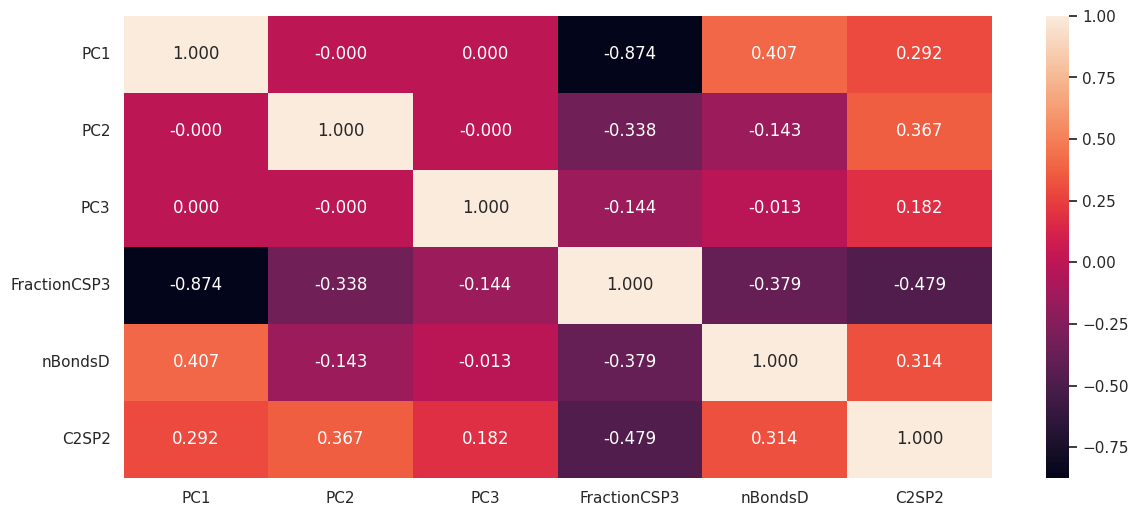

<Figure size 2800x1800 with 0 Axes>

In [73]:
# Объяснение главных компонент
df_pc = pd.DataFrame(data = transformed_data, columns = [f'PC{i}' for i in range(1,63)])
df_col = pd.concat([df_pc[['PC1','PC2','PC3']], df[['FractionCSP3', 'nBondsD', 'C2SP2']]], axis=1)

# Compute the correlations between the original data and PCs
corMatrix = pd.DataFrame.corr(df_col)

# Plot the results
sns.set(rc={'figure.figsize':(14,6)})
sns.heatmap(corMatrix, annot=True, fmt='.3f')
plt.figure(figsize=(28,18))
plt.show()


In [62]:
"""
Из матрицы корреляции можно понять, что PC1 имеет высокую обратную корреляцию с  дескриптором FractionCSP3 
Остальные ГК не проявляют особой корреляции с дескрипторами, имеющими наибольшую важность. 
Здесь можно отметить, что FractionCSP3 имеет значительно большее влияние, чем другие

FractionCSP3 - доля sp3 гибридизованных атомов углерода
"""

'\nИз матрицы корреляции можно понять, что PC1 имеет высокую обратную корреляцию с  дескриптором zpve и прямую с NumAromaticRings, \nPC2 хорошо коррелирует с NumAromaticRings,\nа РС3 имеет высокую обратную корреляцию с r2\nСкорее всего полученные главные компоненты во многом зависят именно от этих фичей\n'

In [63]:
"""
Так же можно снизить размерность, используя нелинейный метод. В данном случае - kernelPCA
"""

'\nТак же можно снизить размерность, используя нелинейный метод. В данном случае - kernelPCA\n'

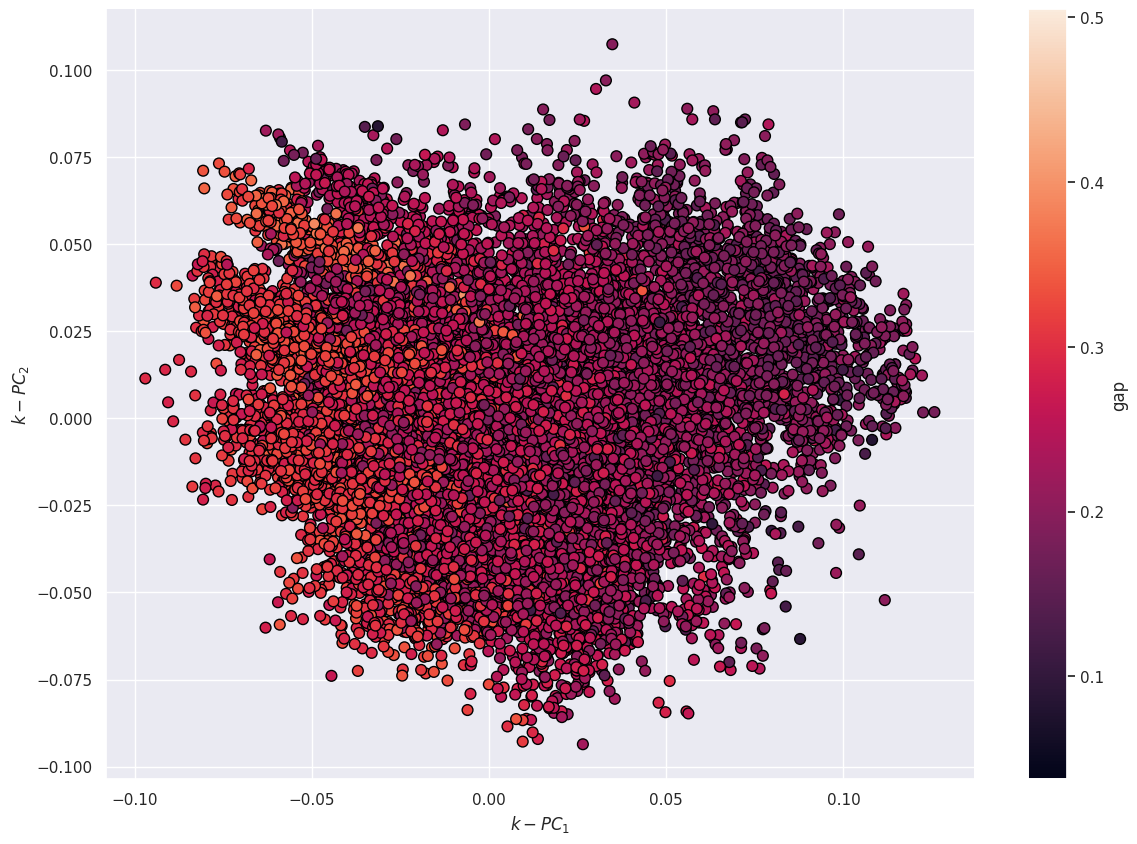

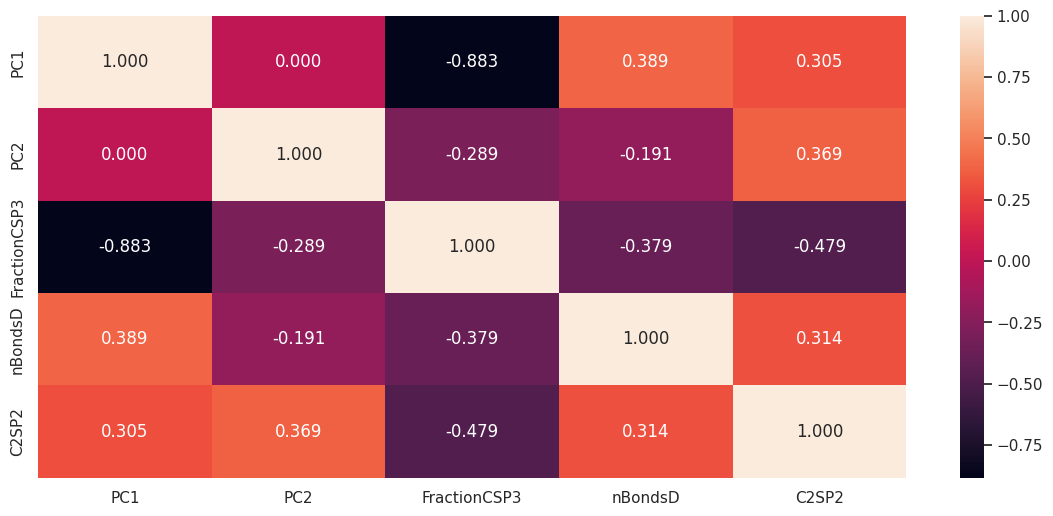

<Figure size 2800x1800 with 0 Axes>

In [69]:
# Kernel PCA with sigmoid kernel
sigmoid_pca = KernelPCA(n_components = 2, kernel='sigmoid', gamma=0.01)
X_sigmoid = sigmoid_pca.fit_transform(scaled_descriptors)

#Plot results
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_sigmoid[:, 0], X_sigmoid[:, 1], c = df_target, s=60, edgecolors='black')
colorbar = fig.colorbar(scatter, ax=ax, label = "gap")
plt.xlabel(r'$k-PC_1$')
plt.ylabel(r'$k-PC_2$')
sns.despine()
plt.show()

# Объяснение главных компонент
df_pc = pd.DataFrame(data = X_sigmoid, columns = [f'PC{i}' for i in range(1,3)])
df_col = pd.concat([df_pc[['PC1','PC2']], df[['FractionCSP3', 'nBondsD', 'C2SP2']]], axis=1)

# Compute the correlations between the original data and PCs
corMatrix = pd.DataFrame.corr(df_col)

# Plot the results
sns.set(rc={'figure.figsize':(14,6)})
sns.heatmap(corMatrix, annot=True, fmt='.3f')
plt.figure(figsize=(28,18))
plt.show()

In [65]:
"""
Из первого графика можно сделать вывод, что при увеличении PC1 снижается таргетная характеристика
Влияние второй главной компоненты слабо заметно
Учитывая, что PC1 имеет достаточно высокую корреляцию с долей sp3 гибридизованных атомов можно сделать предположение,
что с уменьшением фракции атомов углерода с подобной гибридизацией уменьшается значение gap (те есть разницы в энергии ВЗМО и НВМО)

Также видно, что корреляция главных компонент линейного и нелинейного методов PCA в целом похожи.
Для дальнейшей работы будут использованы главные компоненты, полученные методом PCA
"""

'\nИз данного графика можно сделать вывод, что при увеличении PC1 снижается таргетная характеристика\nВлияние второй главной компоненты слабо заметно\nУчитывая, что PC1 имеет достаточно высокую корреляцию с числом ароматических колец можно сделать предположение,\nчто с ростом числа аром. колец уменьшается значение gap (те есть разницы в энергии ВЗМО и НВМО)\n\nТакже видно, что корреляция главных компонент линейного и нелинейного методов PCA в целом похожи.\nДля дальнейшей работы будут использованы главные компоненты, полученные методом PCA\n'

In [66]:
transformed_df


,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,gap
0,-1.678373,0.621798,0.194803,-0.108655,-0.431465,-0.548310,-0.188259,0.467344,0.805793,0.521714,...,-0.145778,0.136180,0.149363,0.164955,-0.016354,-0.087396,-0.223456,-0.053401,-0.154213,0.3049
1,2.413777,-0.958577,-0.133933,1.138349,0.149927,0.444823,0.615890,-0.403380,0.622096,0.674860,...,0.254439,-0.197821,0.313852,0.333831,-0.260601,0.096819,0.107580,-0.060317,-0.168268,0.2454
2,-0.689326,-1.815552,0.366853,-0.893817,-1.023382,-0.887666,-1.467653,0.393151,-0.485834,0.648487,...,-0.076939,-0.304443,0.052689,-0.144657,-0.319800,-0.430828,0.393157,0.162784,-0.047986,0.3155
3,-0.657622,0.078718,0.268385,1.087692,-0.315219,0.852714,1.265713,1.010074,-1.600703,-0.044025,...,0.024200,-0.118433,0.043224,-0.158826,0.009597,0.095494,-0.332864,0.121158,0.010691,0.2787
4,-1.840158,0.408121,-0.076951,-0.399845,-0.861435,-0.115383,0.278299,-1.216077,-0.490411,-1.142720,...,-0.101025,0.227344,-0.051856,0.146840,0.038437,0.148012,-0.029966,0.145328,-0.173955,0.3009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1.380196,0.932830,0.502603,-0.662665,-1.060167,-0.449531,0.255051,0.651034,0.548531,0.585654,...,-0.326707,-0.021937,0.034166,0.141747,0.075824,0.089052,0.024184,0.054577,-0.123785,0.2568
19996,-2.151819,-0.609588,1.444002,-1.039171,-0.131531,0.484563,0.085359,-0.926206,1.124491,-0.017621,...,0.038963,0.252780,0.134570,0.110769,0.020542,-0.083541,-0.127238,0.071983,0.018793,0.2883
19997,0.878514,-0.808301,-0.739619,-0.396917,-0.648273,0.983900,-0.117932,0.154785,1.307304,0.186188,...,-0.210488,-0.133836,-0.143687,-0.102174,0.142018,0.173342,-0.007651,-0.107551,0.138938,0.2517
19998,-1.047566,0.776880,-0.504467,-0.048459,0.267996,-0.437728,-0.543049,0.203558,0.913371,-0.550616,...,-0.025281,-0.075873,-0.223693,0.013592,-0.002673,-0.056313,0.024907,0.024398,0.022180,0.2768


In [67]:
transformed_df.to_csv('/home/student/Desktop/enam/data_preprocessing/3_final_descriptors.csv', index=False)